# Diyabet Tahmini

## 1. Kütüphanelerin Yüklenmesi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df=pd.read_csv("/kaggle/input/diabetes-dataset-for-beginners/diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 2.  Veri Ön İşleme

In [5]:
pd.set_option("display.max_columns",None)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# veri setini incele
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<Axes: ylabel='Frequency'>

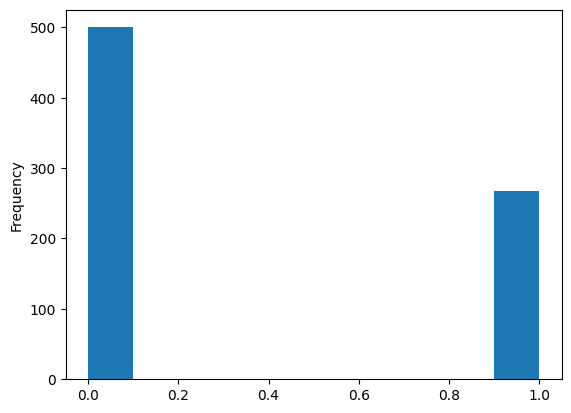

In [9]:
df.Outcome.plot(kind="hist")

In [10]:
df.shape

(768, 9)

In [11]:
#tekrar eden satır kontrolü
df.duplicated().sum()

0

## Korelasyon

In [12]:
df.corr(numeric_only=True)["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

<Axes: >

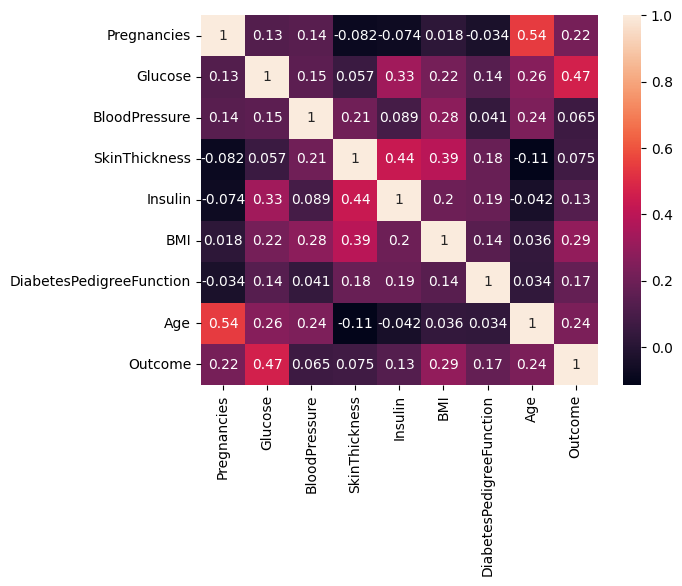

In [13]:
df_matrix=df.corr()
sns.heatmap(df_matrix,annot=True)

## Özellikleri ve Hedefi Belirleme

In [14]:

df = df.drop(['BloodPressure', 'SkinThickness'], axis='columns')
df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


In [15]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [16]:
X

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33
...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63
764,2,122,0,36.8,0.340,27
765,5,121,112,26.2,0.245,30
766,1,126,0,30.1,0.349,47


In [17]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [18]:
X.columns

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age'],
      dtype='object')

Standart Scaler İle Ölçeklendirme

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [20]:
X_scaler = scaler.fit_transform(X)
X_scaler

array([[ 0.63994726,  0.84832379, -0.69289057,  0.20401277,  0.46849198,
         1.4259954 ],
       [-0.84488505, -1.12339636, -0.69289057, -0.68442195, -0.36506078,
        -0.19067191],
       [ 1.23388019,  1.94372388, -0.69289057, -1.10325546,  0.60439732,
        -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.27959377, -0.73518964, -0.68519336,
        -0.27575966],
       [-0.84488505,  0.1597866 , -0.69289057, -0.24020459, -0.37110101,
         1.17073215],
       [-0.84488505, -0.8730192 , -0.69289057, -0.20212881, -0.47378505,
        -0.87137393]])

## 3. Veri Setini Eğitim ve Test Olarak Ayırma

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test ,y_train ,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

## 4. Modelleme ve Modeli Değerlendirme

In [22]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

def classification_models(x, y):
    models = {
        "LogisticRegression": LogisticRegression(max_iter=200),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForestClassifier": RandomForestClassifier(),
        "AdaBoostClassifier": AdaBoostClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(),
        "BernoulliNB": BernoulliNB(),
        "MultinomialNB": MultinomialNB()
    }
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    metrics_list = []  # append yerine liste kullanıyoruz

    for name, model in models.items():
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)

        acc = accuracy_score(y_test, predictions)
        prec = precision_score(y_test, predictions, average='weighted')
        rec = recall_score(y_test, predictions, average='weighted')
        f1 = f1_score(y_test, predictions, average='weighted')

        metrics_list.append({
            "Model": name, 
            "Accuracy": acc, 
            "Precision": prec, 
            "Recall": rec, 
            "F1": f1
        })

        print(f"Model: {name}")
        print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
        print("Classification Report:\n", classification_report(y_test, predictions))
        print("-" * 50)

    # metrics_df'yi oluşturuyoruz
    metrics_df = pd.DataFrame(metrics_list).sort_values(by="F1", ascending=False).reset_index(drop=True)
    print("Model başarı sıralaması:\n", metrics_df)

    # Grafik çizimi
    metrics_df.plot(kind="bar", x="Model", y=["Accuracy", "Precision", "Recall", "F1"], figsize=(10, 6))
    plt.title("Model Performansları")
    plt.xlabel("Modeller")
    plt.ylabel("Değerler")
    plt.xticks(rotation=45)
    plt.show()
    
    return metrics_df


Model: LogisticRegression
Confusion Matrix:
 [[123  28]
 [ 33  47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231

--------------------------------------------------
Model: KNeighborsClassifier
Confusion Matrix:
 [[113  38]
 [ 38  42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       151
           1       0.53      0.53      0.53        80

    accuracy                           0.67       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.67      0.67      0.67       231

--------------------------------------------------
Model: DecisionTreeClassifier
Confusion Matrix:
 [[109  42

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:13

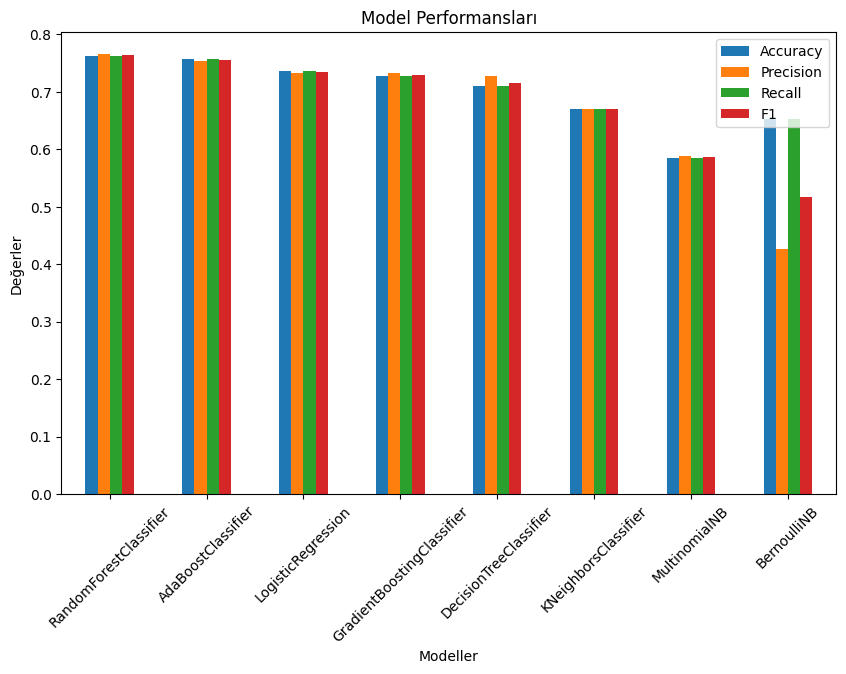

,Model,Accuracy,Precision,Recall,F1
0,RandomForestClassifier,0.761905,0.765838,0.761905,0.763508
1,AdaBoostClassifier,0.757576,0.753929,0.757576,0.755214
2,LogisticRegression,0.735931,0.732429,0.735931,0.733822
3,GradientBoostingClassifier,0.727273,0.733571,0.727273,0.729753
4,DecisionTreeClassifier,0.709957,0.728092,0.709957,0.715235
5,KNeighborsClassifier,0.670996,0.670996,0.670996,0.670996
6,MultinomialNB,0.584416,0.589304,0.584416,0.586695
7,BernoulliNB,0.653680,0.427297,0.653680,0.516783


In [23]:
classification_models(X, y)

## Model Seçimi

In [24]:
model = AdaBoostClassifier(n_estimators=100, random_state=42)

## 5. Model Eğitme

In [25]:
model.fit(X_train_res, y_train_res)

AdaBoostClassifier(n_estimators=100, random_state=42)

## 6. Modeli Kaydetme

In [26]:
##modeli .pkl formatında kaydet
#with open('model_adi.pkl','wb') as file:
    #pickle.dump(model, file)

In [27]:
#with open('model_adi.pkl', 'rb') as file:
#    model = pickle.load(file)
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Tahmin yap
#y_pred = model.predict(X_test)

# Değerlendirme metrikleri
#print("Accuracy:", accuracy_score(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))
